# Conditional Average Treatment Effect
The analyst has access to $n$ independent and identically distributed examples $(X_i, Y_i, T_i)$, $i = 1, ..., n$, where $X_i ∈ X$ denotes per-person features, $Y_i ∈ R$ is the observed outcome, and $T_i ∈ \{0, 1\}$ is the treatment assignment. We posit the existence of potential outcomes $\{Y_i(0), Y_i(1)\}$ corresponding to the outcome we would have observed given the treatment assignment $T_i$ = 0 or 1 respectively, such that $Y_i = Y_i(T_i)$. Here, we want to understand how treatment effects vary with the observed covariates $X_i$, and consider the conditional average treatment effect (CATE) $\mathbb{E}[Y_i(1) - Y_i(0)|X_i=x]$ as our estimand.



In [1]:
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from statistics import mean
import math

## Example 1: Linear Dataset
The outcome is a linear combination of the observed covariates. 

$X_j \sim \mathcal{N}(0,1)$

$Y(0) = X_1+X_2+\mathcal{N}(0,0.5)$

$Y(1) = X_1+X_3+\mathcal{N}(0,0.5)$

In [7]:
## Generating the linear dataset

samples = 1000


columns = ['X1', 'X2', 'X3', 'T', 'Y']

# initializing with zero
df = pd.DataFrame(data=np.full(shape=(samples, len(columns)), fill_value=0, dtype=float), columns=columns)

#randomly assigning treatment to samples
df.loc[random.randint(samples, size=int(samples/2)), 'T'] = 1
print('Number of samples with treatment T=1: ', sum(df['T']))
print('Total number of samples: ', samples)

# Generate a random normal distribution with mean at 0 and standard deviation of 1:
df.X1 = random.normal(loc=0, scale=1, size=samples)
df.X2 = random.normal(loc=0, scale=1, size=samples)
df.X3 = random.normal(loc=0, scale=1, size=samples)

noise = random.normal(loc=0, scale=0.5, size=samples)


# Calculating Y
idx_0 = list(df.loc[df['T'] == 0,'Y'].index) 
idx_1 = list(df.loc[df['T'] == 1,'Y'].index) 
df.loc[idx_0, 'Y'] = df.loc[idx_0, 'X1'] + (df.loc[idx_0, 'X2'] ** 2)/2 + noise[idx_0]
df.loc[idx_1, 'Y'] = df.loc[idx_1, 'X1'] + (df.loc[idx_1, 'X3'] ** 2)/2 + noise[idx_1]

df.head()

Number of samples with treatment T=1:  383.0
Total number of samples:  1000


,X1,X2,X3,T,Y
0,0.810457,-0.065351,-1.201628,0.0,0.641648
1,0.635501,0.049423,0.281896,1.0,0.596476
2,-0.451847,0.341874,-0.120801,1.0,-0.647184
3,-0.213294,-0.463580,-0.796365,0.0,-0.223486
4,-1.483487,1.101983,0.181852,1.0,-0.978236


Estimating average treatment effect using **Linear Regression**.

Conditional average treatment effect estimated by linear regression is : [-0.01154414]


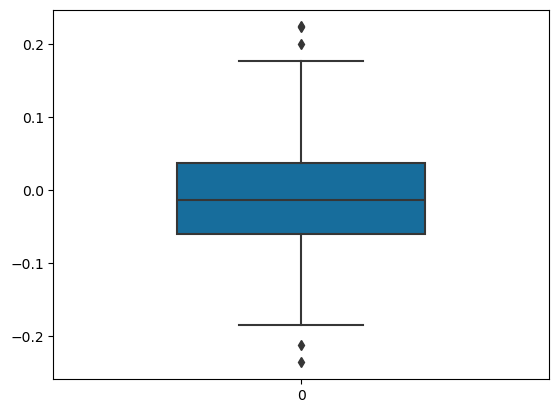

In [8]:
model_0 = LinearRegression().fit(df.loc[idx_0, ['X1', 'X2', 'X3']], df.loc[idx_0, ['Y']])
model_1 = LinearRegression().fit(df.loc[idx_1, ['X1', 'X2', 'X3']], df.loc[idx_1, ['Y']])

Y0 = model_0.predict(df[['X1', 'X2', 'X3']])
Y1 = model_1.predict(df[['X1', 'X2', 'X3']])

TE = Y1 - Y0

bplot=sns.boxplot(data=TE, width=0.5, palette="colorblind")
ATE = sum(TE)/len(TE)
print('Conditional average treatment effect estimated by linear regression is :', ATE)

<div class="alert alert-block alert-warning">
    
Task 1: What do you think is the actual causal effect? 

</div>

In [92]:
#Answer: There is no causal effect? We assigned values randomly. 
#When the CATE is positive there is a positive association with the treatment.

<div class="alert alert-block alert-warning">
    Task 2: Change the number of samples to $10, 10^2, ..., 10^6$. How changing the number of samples will effect the ATE estimation using linear regression.

</div>

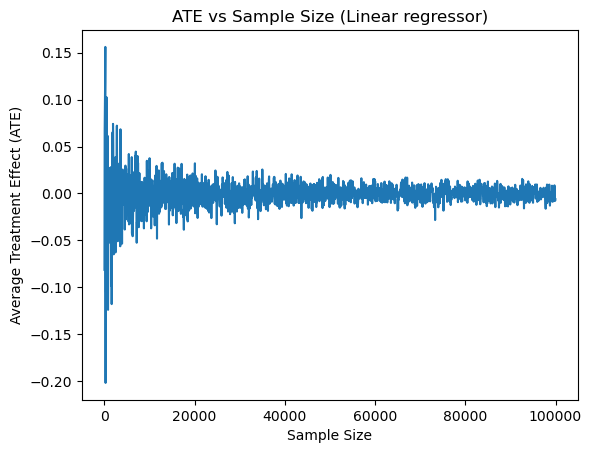

In [14]:
# Answer: Here is a plot of ATE over different sample sizes... converges to zero (randomness)

# Function to calculate ATE
def calculate_ate(df):
    idx_0 = list(df.loc[df['T'] == 0, 'Y'].index)
    idx_1 = list(df.loc[df['T'] == 1, 'Y'].index)
    model_0 = LinearRegression().fit(df.loc[idx_0, ['X1', 'X2', 'X3']], df.loc[idx_0, ['Y']])
    model_1 = LinearRegression().fit(df.loc[idx_1, ['X1', 'X2', 'X3']], df.loc[idx_1, ['Y']])
    Y0 = model_0.predict(df[['X1', 'X2', 'X3']])
    Y1 = model_1.predict(df[['X1', 'X2', 'X3']])
    TE = Y1 - Y0
    ATE = sum(TE) / len(TE)
    return ATE

# initializing to store results
results_df = pd.DataFrame(columns=['Sample_Size', 'ATE'])

# Iterate over different sample sizes
for samples in range(10, 100001, 50):
    columns = ['X1', 'X2', 'X3', 'T', 'Y']
    df = pd.DataFrame(data=np.full(shape=(samples, len(columns)), fill_value=0, dtype=float), columns=columns)
    df.loc[random.randint(samples, size=int(samples / 2)), 'T'] = 1
    df.X1 = random.normal(loc=0, scale=1, size=samples)
    df.X2 = random.normal(loc=0, scale=1, size=samples)
    df.X3 = random.normal(loc=0, scale=1, size=samples)
    idx_0 = list(df.loc[df['T'] == 0, 'Y'].index)
    idx_1 = list(df.loc[df['T'] == 1, 'Y'].index)
    noise = random.normal(loc=0, scale=0.5, size=samples) #noise
    df.loc[idx_0, 'Y'] = df.loc[idx_0, 'X1'] + df.loc[idx_0, 'X2'] + noise[idx_0]
    df.loc[idx_1, 'Y'] = df.loc[idx_1, 'X1'] + df.loc[idx_1, 'X3'] + noise[idx_1]
    
    ATE = calculate_ate(df)
    results_df = results_df._append({'Sample_Size': samples, 'ATE': ATE}, ignore_index=True)

# Plotting the 2D graph
plt.plot(results_df['Sample_Size'], results_df['ATE'])
plt.xlabel('Sample Size')
plt.ylabel('Average Treatment Effect (ATE)')
plt.title('ATE vs Sample Size (Linear regressor)')
plt.show()


<div class="alert alert-block alert-warning">

Task 3: repeat the experiment using non linear classifier e.g. random forest.  
</div>

/var/folders/m1/5ms9qc214pl6gncxzmtk57040000gn/T/ipykernel_82887/3758467527.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = results_df._append({'Sample_Size': samples, 'ATE': ATE}, ignore_index=True)


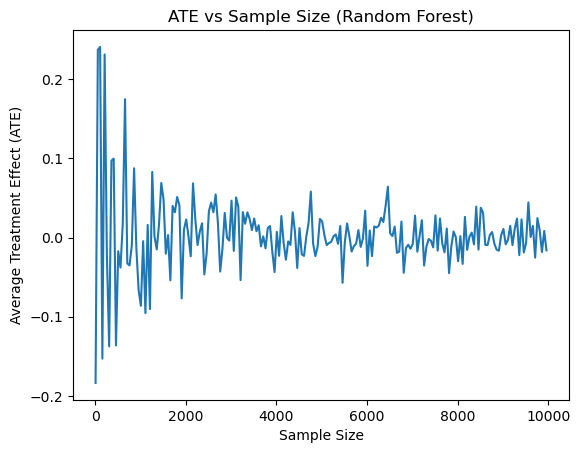

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Function to calculate ATE using Random Forest
def calculate_ate(df):
    idx_0 = list(df.loc[df['T'] == 0, 'Y'].index)
    idx_1 = list(df.loc[df['T'] == 1, 'Y'].index)
    
    # Use RandomForestRegressor instead of LinearRegression
    model_0 = RandomForestRegressor(n_estimators=100, random_state=42)
    model_0.fit(df.loc[idx_0, ['X1', 'X2', 'X3']], df.loc[idx_0, 'Y'].ravel())  # Use ravel() to convert to 1D array
    
    model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
    model_1.fit(df.loc[idx_1, ['X1', 'X2', 'X3']], df.loc[idx_1, 'Y'].ravel())  # Use ravel() to convert to 1D array
    
    Y0 = model_0.predict(df[['X1', 'X2', 'X3']])
    Y1 = model_1.predict(df[['X1', 'X2', 'X3']])
    
    TE = Y1 - Y0
    ATE = np.mean(TE)
    return ATE

# Initializing to store results
results_df = pd.DataFrame(columns=['Sample_Size', 'ATE'])

# Iterate over different sample sizes
for samples in range(10, 10001, 50):
    columns = ['X1', 'X2', 'X3', 'T', 'Y']
    df = pd.DataFrame(data=np.full(shape=(samples, len(columns)), fill_value=0, dtype=float), columns=columns)
    df.loc[random.randint(samples, size=int(samples / 2)), 'T'] = 1
    df.X1 = random.normal(loc=0, scale=1, size=samples)
    df.X2 = random.normal(loc=0, scale=1, size=samples)
    df.X3 = random.normal(loc=0, scale=1, size=samples)
    noise = random.normal(loc=0, scale=0.5, size=samples) #noise
    idx_0 = list(df.loc[df['T'] == 0, 'Y'].index)
    idx_1 = list(df.loc[df['T'] == 1, 'Y'].index)
    df.loc[idx_0, 'Y'] = df.loc[idx_0, 'X1'] + df.loc[idx_0, 'X2'] + noise[idx_0]
    df.loc[idx_1, 'Y'] = df.loc[idx_1, 'X1'] + df.loc[idx_1, 'X3'] + noise[idx_1]
    ATE = calculate_ate(df)
    results_df = results_df._append({'Sample_Size': samples, 'ATE': ATE}, ignore_index=True)

# Plotting the 2D graph
plt.plot(results_df['Sample_Size'], results_df['ATE'])
plt.xlabel('Sample Size')
plt.ylabel('Average Treatment Effect (ATE)')
plt.title('ATE vs Sample Size (Random Forest)')
plt.show()


## Example 2: Non-linear Dataset
The outcome is a non-linear combination of the observed covariates. 

$X_j \sim \mathcal{N}(0,1)$

$Y(0) = X_1+X_2^2/2+\mathcal{N}(0,0.5)$

$Y(1) = X_1+X_3^2/2+\mathcal{N}(0,0.5)$

In [22]:
## Generating the non linear dataset
samples = 100000
columns = ['X1', 'X2', 'X3', 'T', 'Y']

print('For the same set of data, Linear Regression CATE, Random Forest Regression CATE and the relative discrepancies are:')
for i in range (1,11):
    # initializing with zero
    df = pd.DataFrame(data=np.full(shape=(samples, len(columns)), fill_value=0, dtype=float), columns=columns)
    
    #randomly assigning treatment to samples
    df.loc[random.randint(samples, size=int(samples/2)), 'T'] = 1
    #print('Number of samples with treatment T=1: ', sum(df['T']))
    #print('Total number of samples: ', samples)
    
    # Generate a random normal distribution with mean at 0 and standard deviation of 1:
    df.X1 = random.normal(loc=0, scale=1, size=samples)
    df.X2 = random.normal(loc=0, scale=1, size=samples)
    df.X3 = random.normal(loc=0, scale=1, size=samples)
    noise = random.normal(loc=0, scale=0.5, size=samples) #noise
    
    # Calculating Y
    idx_0 = list(df.loc[df['T'] == 0,'Y'].index) 
    idx_1 = list(df.loc[df['T'] == 1,'Y'].index) 
    df.loc[idx_0, 'Y'] = df.loc[idx_0, 'X1'] + (df.loc[idx_0, 'X2'] ** 2)/2 + noise[idx_0]
    df.loc[idx_1, 'Y'] = df.loc[idx_1, 'X1'] + (df.loc[idx_1, 'X3'] ** 2)/2 + noise[idx_1]
    df.head()
    
    model_0 = LinearRegression().fit(df.loc[idx_0, ['X1', 'X2', 'X3']], df.loc[idx_0, ['Y']])
    model_1 = LinearRegression().fit(df.loc[idx_1, ['X1', 'X2', 'X3']], df.loc[idx_1, ['Y']])
    
    Y0 = model_0.predict(df[['X1', 'X2', 'X3']])
    Y1 = model_1.predict(df[['X1', 'X2', 'X3']])
    
    TE = Y1 - Y0
    #bplot=sns.boxplot(data=TE, width=0.5, palette="colorblind")
    LRCATE = sum(TE)/len(TE)

    
    #Random forest regressor function
    def calculate_RFCATE(df):
        idx_0 = list(df.loc[df['T'] == 0, 'Y'].index)
        idx_1 = list(df.loc[df['T'] == 1, 'Y'].index)
            
        model_0 = RandomForestRegressor(n_estimators=50, random_state=10)
        model_0.fit(df.loc[idx_0, ['X1', 'X2', 'X3']], df.loc[idx_0, 'Y'].ravel())  # Use ravel() to convert to 1D array
        
        model_1 = RandomForestRegressor(n_estimators=50, random_state=10)
        model_1.fit(df.loc[idx_1, ['X1', 'X2', 'X3']], df.loc[idx_1, 'Y'].ravel())  # Use ravel() to convert to 1D array
        
        Y0 = model_0.predict(df[['X1', 'X2', 'X3']])
        Y1 = model_1.predict(df[['X1', 'X2', 'X3']])
        
        TE = Y1 - Y0
        RFCATE = np.mean(TE)
        return RFCATE
    

    RFCATE = calculate_RFCATE(df)
    def relative_discrepancy(a, b):
        return abs(a - b) / (0.5 * (abs(a) + abs(b)))

    discrepancy = relative_discrepancy(LRCATE, RFCATE)
    print(LRCATE, RFCATE, discrepancy*100, '%')


For the same set of data, Linear Regression CATE, Random Forest Regression CATE and the relative discrepancies are:
[-0.0063325] -0.007211632877631988 [12.98177049] %
[0.00362671] 0.004323610454022803 [17.53148174] %
[-0.00091352] -0.0011403622553868215 [22.08879002] %
[-0.00484927] -0.0026925886736053504 [57.19230579] %
[0.00073674] -0.0020636274177789514 [200.] %
[-0.00800201] -0.006230069609178867 [24.90069288] %
[-0.00539676] -0.007378081070306515 [31.01909705] %
[0.00241485] 0.0017772209617163582 [30.4208804] %
[-0.00348143] -0.0006811483477683266 [134.54555409] %
[0.00886843] 0.0014954215020257556 [142.28318899] %


<div class="alert alert-block alert-warning">

Task 4: Estimate average tretment effect using both random forest and linear regression. Hint: to get a more reliable estimation repeat each experiment 10 times and use 100000 sample. 

</div>

In [ ]:
#See above
#The relative discrepancies expressed in percentages for 10 respective datasets using the two methods are between 13 and 200% 
#which is significant.

<div class="alert alert-block alert-warning">

Task 5: Which one of the linear regression and random forest are more suitable for linear and non linear datasets? 

</div>

In [41]:
#In the linear data set, both performed equally well.  
#In the non linear data set, we expect the random forest to do better at modelling possible complex relationships 
#between covariates. 

## Example 3: Discrimination case study in California State University

In 2014, at California State University, Stanley A. Taylor & Amy E. Mickel published a paper as “A Data Set and Discrimination case study”. Below is a gist of the paper and a visualization of the case study in Jupyter - Python Notebook.

A few years ago, number of years ago, an allegation of discrimination was made and supported by a univariate analysis that examined average annual expenditures on consumers by ethnicity. The analysis revealed that the average annual expenditures on Hispanic consumers was approximately one-third (⅓) of the average expenditures on White non-Hispanic consumers.

This finding was the catalyst for further investigation; subsequently, state legislators and department managers sought consulting services from a statistician (the lead author).
Understanding the concept of specific variation, the statistician looked for other potential sources of variation including age. A bivariate analysis examining ethnicity and age (divided into six age cohorts) revealed that ethnic discrimination did not exist. Moreover, in all but one of the age cohorts, the trend reversed where the average annual expenditures on White non-Hispanic consumers were less than the expenditures on Hispanic consumers—a classic example of Simpson’s paradox!

Credit: https://www.kaggle.com/datasets/wduckett/californiaddsexpenditures?resource=download

In [23]:
df_real =pd.read_csv("californiaDDSDataV2.csv")
df_real.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


Our problem statement is to determine if there is Ethnic bias in the Expenditures. Let us find the mean of Expenditures per Ethnicity and check if the claim is valid.

In [24]:
df_real[['Expenditures', 'Ethnicity']].groupby('Ethnicity').mean().sort_values('Expenditures')

,Expenditures
Ethnicity,
Other,3316.500000
Multi Race,4456.730769
Hispanic,11065.569149
Asian,18392.372093
Black,20884.593220
White not Hispanic,24697.548628
American Indian,36438.250000
Native Hawaiian,42782.333333


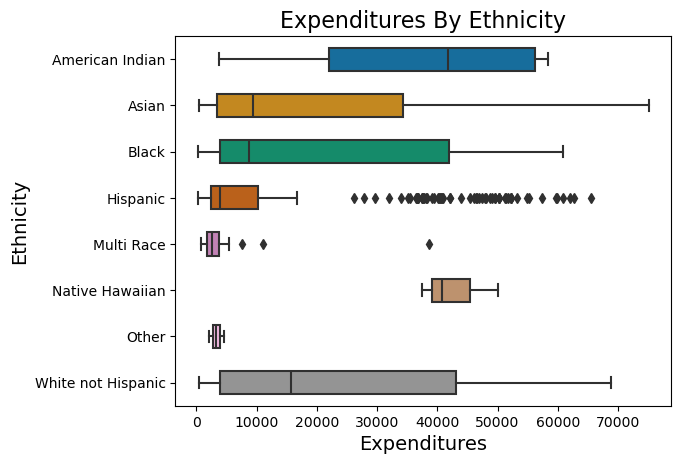

In [25]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df_real.sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

From the above graph, it looks like there is discrimination towards multiple ethnic groups. Now, let us dive more into data using other features available in data set.

In [26]:
#Let us begin with grouping the Expenditures data on Gender:
df_real.loc[:,['Gender', 'Expenditures']].groupby('Gender').mean().sort_values('Gender')

,Expenditures
Gender,
Female,18129.606362
Male,18001.195171


There is no significant difference in Expenditure with respect to Male and Female. This means we can ignore Gender feature in our future analysis.

In [27]:
#Let us consider Age. We will use Age Cohort feature available in the data set.
df_real.loc[:,['Age Cohort', 'Expenditures']].groupby('Age Cohort').mean().sort_values('Expenditures')

,Expenditures
Age Cohort,
0 to 5,1415.280488
6 to 12,2226.862857
13 to 17,3922.613208
18 to 21,9888.537688
22 to 50,40209.283186
51+,53521.896226


The above result provides reasonable insights that the funds allocations were performed basis of Age.

In [28]:
df = df_real.loc[:,['Age Cohort', 'Expenditures', 'Ethnicity']]

In [29]:
#Let us get a perspective of how funds are allocated to different Ethnicities within the Age groups.
zero_to_5 = df['Age Cohort'] == '0 to 5'
six_to_12 = df['Age Cohort'] == '6 to 12'
thirteen_to_17 = df['Age Cohort'] == '13 to 17'
eighteen_to_21 = df['Age Cohort'] == '18 to 21'
twentytwo_to_50 = df['Age Cohort'] == '22 to 50'
fiftyone_plus = df['Age Cohort'] == '51+'

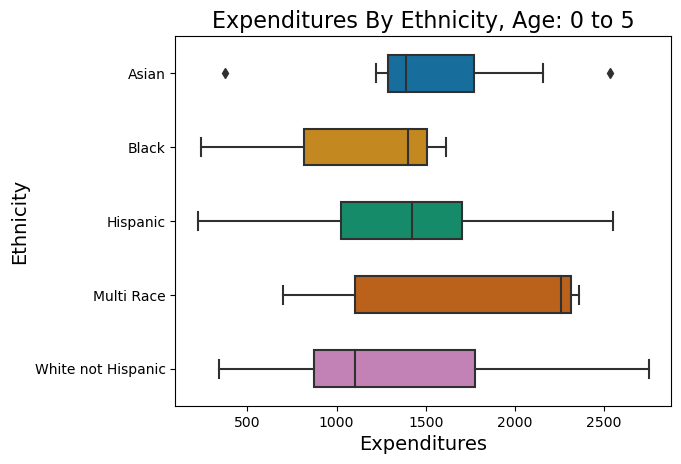

In [102]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df.where(zero_to_5).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 0 to 5", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

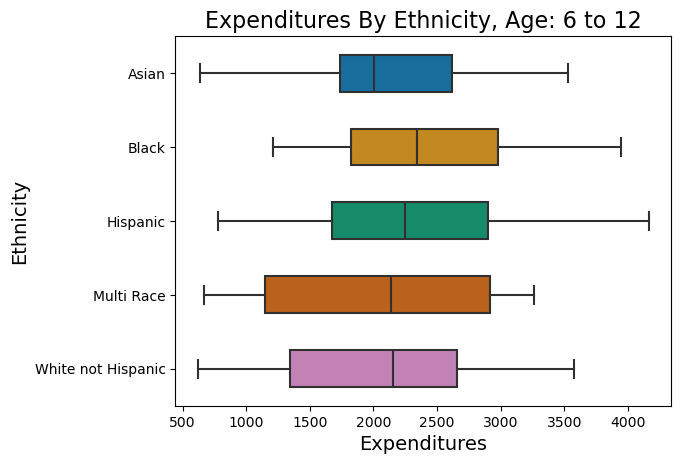

In [30]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df.where(six_to_12).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 6 to 12", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

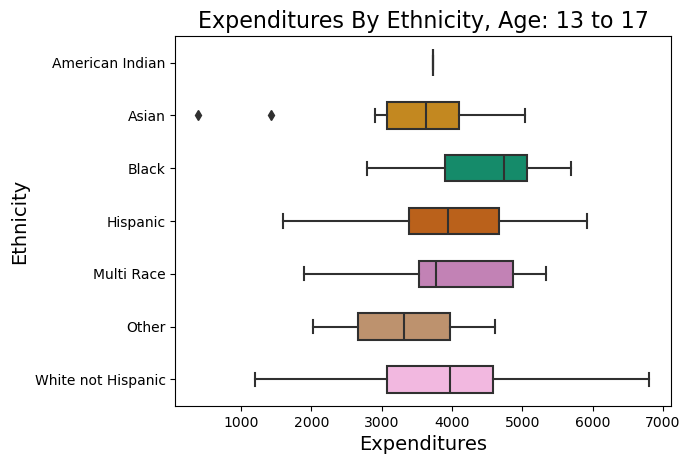

In [31]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df.where(thirteen_to_17).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 13 to 17", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

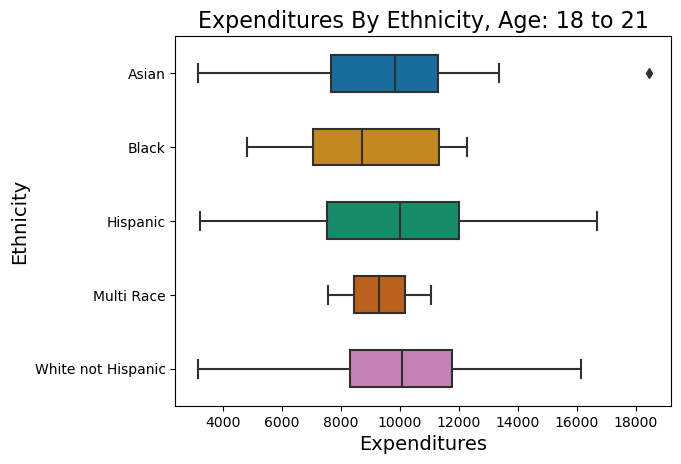

In [105]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df.where(eighteen_to_21).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 18 to 21", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

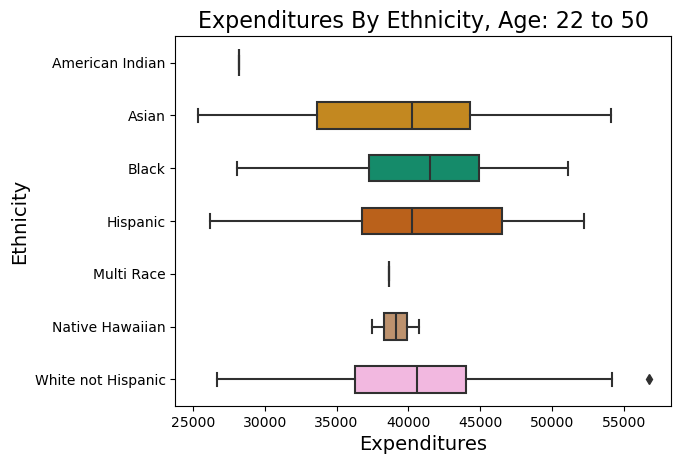

In [32]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df.where(twentytwo_to_50).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 22 to 50", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

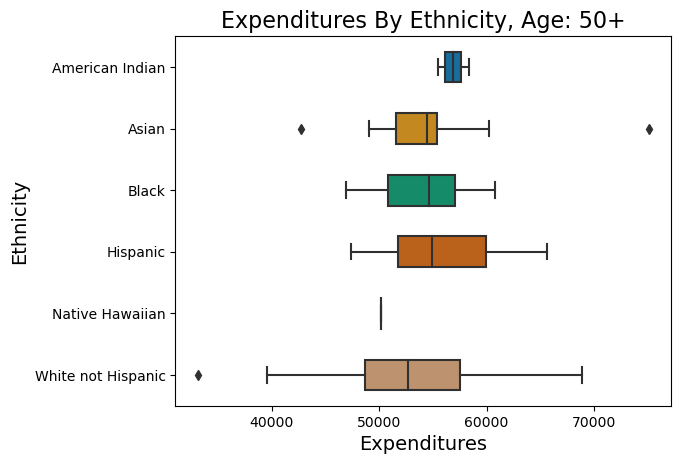

In [107]:
bplot=sns.boxplot(y='Ethnicity', x='Expenditures', 
                 data=df.where(fiftyone_plus).dropna().sort_values('Ethnicity'), 
                 width=0.5,
                 palette="colorblind")
bplot.axes.set_title("Expenditures By Ethnicity, Age: 50+", fontsize=16) 
bplot.set_xlabel("Expenditures", fontsize=14)
bplot.set_ylabel("Ethnicity", fontsize=14) 
bplot.tick_params(labelsize=10)

From the above box plots, it shows there has been no discrimination towards any ethnicity when expenditures have been broken down by age groups.



## Conclusion:
This is a classic case of Simpson’s paradox as when the combined data been plotted has shown the discrimination. But when the data is broken down to different groups, this discrimination claim has been proven wrong.

## Reference:  
1. “A Data Set and Discrimination case study” by Stanley A. Taylor & Amy E. Mickel
2. https://en.wikipedia.org/wiki/Simpson%27s_paradox#Examples
3. https://www.kaggle.com/datasets/wduckett/californiaddsexpenditures/code?resource=download


<div class="alert alert-block alert-warning">

Task 6: Calculate causal effect of expenditures for each ethnicity group conditioning on Age cohort:
    
$\mathbb{E}[Y|do(T=t)] = \mathbb{E}_C \mathbb{E}[Y|t,C]= \sum_c \mathbb{E}[Y|t,c]P(c)$ 
    
t : represents each ethnic group

$\mathbb{E}[Y|t,c]$: represents the mean for the $t^th$ ethnic group in the $c^th$ age group
    
P(c): represents the percentage of the $t^th$ ethnic group in the $c^th$ age group

</div>

In [34]:
import pandas as pd
import numpy as np

# Load the data
df_real = pd.read_csv("californiaDDSDataV2.csv")

# Select relevant columns
df = df_real.loc[:, ['Age Cohort', 'Expenditures', 'Ethnicity']]

# Extract data into arrays
Y = df['Expenditures'].values
T = df['Ethnicity'].values
C = df['Age Cohort'].values

# Function to calculate causal effect for each ethnic group
def calculate_causal_effect(Y, T, C):
    unique_ethnicities = np.unique(T)
    unique_age_cohorts = np.unique(C)
    
    causal_effect_dict = {}
    
    for t in unique_ethnicities:
        causal_effect = 0.0
        
        for c in unique_age_cohorts:
            mask_t = T == t
            mask_c = C == c
            
            # Check if there is data for the combination
            if np.any(mask_t & mask_c):
                # Calculate mean for the t-th ethnic group in the c-th age cohort
                mean_Y_given_t_c = np.mean(Y[mask_t & mask_c])
                
                # Calculate percentage of the t-th ethnic group in the c-th age cohort
                P_c = np.sum(T[mask_c] == t) / np.sum(C == c)
                
                # Accumulate the causal effect
                causal_effect += mean_Y_given_t_c * P_c
        
        # Store the causal effect for the current ethnicity
        causal_effect_dict[t] = causal_effect
    
    return causal_effect_dict

# Calculate causal effect for each ethnic group
causal_effect_result = calculate_causal_effect(Y, T, C)

# Print the results
print("Causal Effect of Expenditures for Each Ethnicity Group:")
for ethnicity, effect in causal_effect_result.items():
    print(f"{ethnicity}: {effect}")

total_causal_effect = sum(causal_effect_result.values())
print(f"Total Causal Effect of Expenditures for All Ethnicity Groups: {total_causal_effect}")

Causal Effect of Expenditures for Each Ethnicity Group:
American Indian: 1216.1688094840542
Asian: 14455.676637438686
Black: 7470.031899344078
Hispanic: 24476.461795745
Multi Race: 650.5042721895575
Native Hawaiian: 819.072549674403
Other: 31.287735849056602
White not Hispanic: 62065.26995346809
Total Causal Effect of Expenditures for All Ethnicity Groups: 111184.47365319292


In [36]:
#So for different age groups within an ethnic group we see a variation in expenditure.
#The greatest variation is within the white non hispanic group, which is why, it affects the overall numbers of that group,
#making it appear biased?